# 4. Exploratory Data Analysis

**탐색적 데이터 분석을 통해 데이터를 통달해봅시다.** with [Titanic Data](https://www.kaggle.com/c/titanic)

0. 라이브러리 준비
1. 분석의 목적과 변수 확인
2. 데이터 전체적으로 살펴보기
3. 데이터의 개별 속성 파악하기

## 0. 라이브러리 준비

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## 1. 분석의 목적과 변수 확인

In [2]:
titanic_df = pd.read_csv('titanic/train.csv')

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
## 각 Column의 데이터 타입 확인하기
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## 2. 데이터 전체적으로 살펴보기

In [5]:
# 데이터 전체 정보를 얻는 함수 : .describe()
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
## 상관계수 확인
titanic_df.corr()

#Correlation is not Causation
# 상관성 : A up, B up, ...
# 인과성 : A -> B

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [7]:
## 결측치 확인
titanic_df.isnull().sum()
# Age, Cabin, Embarked 에서 결측치 발견

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 3. 데이터의 개별 속성 파악하기

In [8]:
## 생존자, 사망자 명수는?
titanic_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

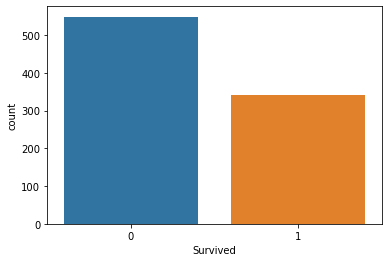

In [9]:
## 생존자수와 사망자수를 Barplot으로 그려보기 sns.countplot()
sns.countplot(x='Survived', data=titanic_df)
plt.show()


In [10]:
# Pclass에 따른 인원 파악
titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).count()

,Survived
Pclass,
1,216
2,184
3,491


In [11]:
# 생존자 인원?
titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [12]:
# 생존 비율?
titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


[]

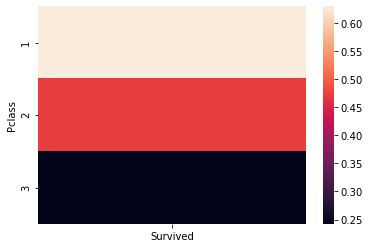

In [13]:
# 히트맵 활용
sns.heatmap(titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).mean())
plt.plot()

In [14]:
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

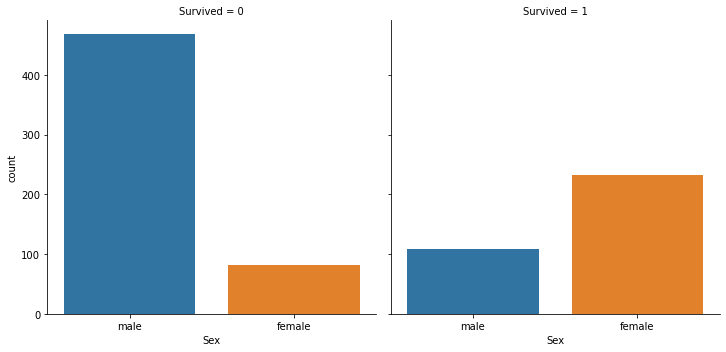

In [15]:
# sns.catplot
sns.catplot(x='Sex', col='Survived', kind='count', data=titanic_df)
plt.show()

In [16]:
titanic_df.describe()['Age']

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

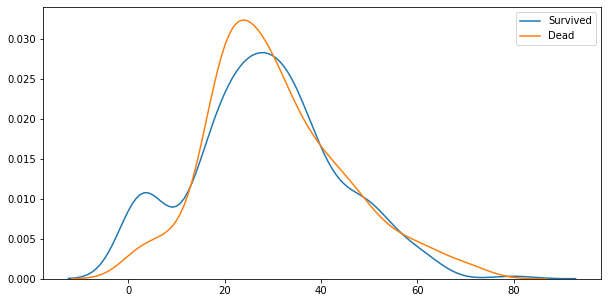

In [17]:
## Survived 1, 0과 Age의 경향성

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.kdeplot(titanic_df[titanic_df.Survived == 1]['Age'], ax = ax)
sns.kdeplot(titanic_df[titanic_df.Survived == 0]['Age'], ax = ax)
plt.legend(['Survived', 'Dead'])
plt.show()

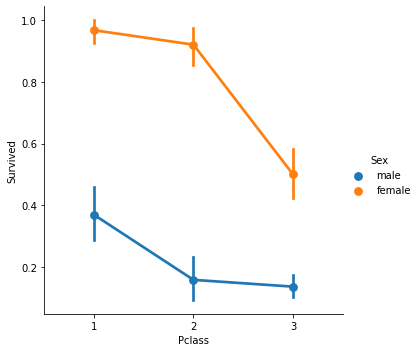

In [18]:
sns.catplot(x='Pclass',y='Survived', hue='Sex', kind='point', data=titanic_df)
plt.show()

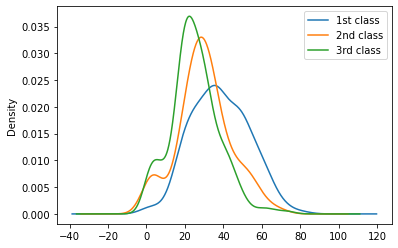

In [19]:
## Age graph with Pclass

titanic_df['Age'][titanic_df.Pclass == 1].plot(kind='kde')
titanic_df['Age'][titanic_df.Pclass == 2].plot(kind='kde')
titanic_df['Age'][titanic_df.Pclass == 3].plot(kind='kde')
plt.legend(['1st class', '2nd class', '3rd class'])
plt.show()

## Mission : It's Your Turn!

### 1. 본문에서 언급된 Feature를 제외하고 유의미한 Feature를 1개 이상 찾아봅시다.

- Hint : Fare? Sibsp? Parch?



In [20]:
titanic_df.corr()
# 생존율과 Fare의 상관계수가 가장 높다.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


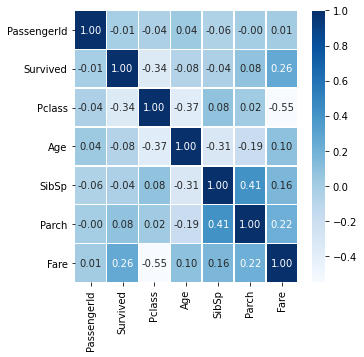

In [21]:
plt.figure(figsize=(5,5))
sns.heatmap(data=titanic_df.corr(), annot=True, fmt='.2f', linewidths=.5, cmap='Blues')
plt.show()

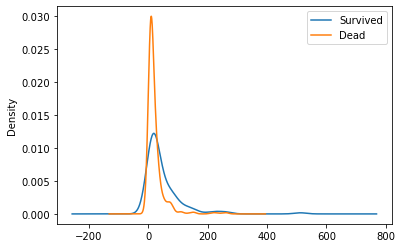

In [22]:
titanic_df['Fare'][titanic_df.Survived == 1].plot(kind='kde')
titanic_df['Fare'][titanic_df.Survived == 0].plot(kind='kde')
plt.legend(['Survived','Dead'])
plt.show()

생존율과 요금의 경향성을 비교하면 요금과 생존율에서 상관성을 확인할 수 있다. 
요금(Fare)는 Pclass와 많은 상관성을 가질 것을 예상할 수 있다.
따라서 Fare와 Pclass와의 경향성을 비교해보자.

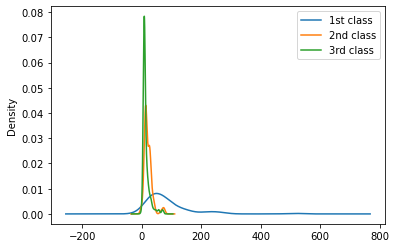

In [23]:
titanic_df['Fare'][titanic_df.Pclass == 1].plot(kind='kde')
titanic_df['Fare'][titanic_df.Pclass == 2].plot(kind='kde')
titanic_df['Fare'][titanic_df.Pclass == 3].plot(kind='kde')
plt.legend(['1st class','2nd class', '3rd class'])
plt.show()

적은 Fare를 지불한 승객일수록 3rd class에 가까운 좌석티켓을 구입했음을 볼 수 있다.
Pclass는 사망율과 높은 상관성을 가지고 따라서 Fare는 Pclass와 사망율과 상관성을 가진다고 예상해볼 수 있다.

### 2. [Kaggle](https://www.kaggle.com/datasets)에서 Dataset을 찾고, 이 Dataset에서 유의미한 Feature를 3개 이상 찾고 이를 시각화해봅시다.

함께 보면 좋은 라이브러리 document
- [numpy]()
- [pandas]()
- [seaborn]()
- [matplotlib]()

In [95]:
airdf = pd.read_csv('Measurement_summary.csv')
airdf.head()

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 0:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.059,0.002,1.2,73,57
1,2017-01-01 1:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.058,0.002,1.2,71,59
2,2017-01-01 2:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70,59
3,2017-01-01 3:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70,58
4,2017-01-01 4:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.051,0.002,1.2,69,61


In [96]:
date_time = airdf['Measurement date'].str.split(' ', n=1, expand=True)
airdf = airdf.drop(['Measurement date'], axis=1)
date_time.head()

,0,1
0,2017-01-01,0:00
1,2017-01-01,1:00
2,2017-01-01,2:00
3,2017-01-01,3:00
4,2017-01-01,4:00


In [143]:
airdf['date'] = date_time[0]
airdf['time'] = date_time[1].str.split(':', n=1, expand=True)
airdf['time'] = airdf['time'].astype('int')
airdf['time'].head()

0    0
1    1
2    2
3    3
4    4
Name: time, dtype: int32

In [144]:
# groupby date
airdf_date = airdf.groupby(['date'], as_index=False).agg({'SO2':'mean', 'NO2':'mean', 'O3':'mean', 'CO':'mean', 'PM10':'mean', 'PM2.5':'mean'})
airdf_date.head()

,date,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01,0.003627,0.044765,0.002478,0.981833,77.201667,56.773333
1,2017-01-02,0.002707,0.035960,0.013127,0.891333,109.243333,77.838333
2,2017-01-03,0.000602,0.037017,0.008223,0.753833,78.546667,51.533333
3,2017-01-04,0.004122,0.048813,0.006918,0.878500,54.966667,34.533333
4,2017-01-05,0.003122,0.033892,0.009725,0.656333,36.246667,22.168333


### TIME CORRELATION 

In [150]:
airdf_time = airdf.groupby(['time'], as_index=False).agg({'SO2':'mean', 'NO2':'mean', 'O3':'mean', 'CO':'mean', 'PM10':'mean', 'PM2.5':'mean'})
airdf_time

,time,SO2,NO2,O3,CO,PM10,PM2.5
0,0,-0.001909,0.024584,0.011626,0.529891,41.944368,24.651817
1,1,-0.002126,0.021533,0.012065,0.524424,40.927181,24.091507
2,2,-0.002047,0.019609,0.012448,0.516841,40.558962,24.103003
3,3,-0.002203,0.018209,0.012198,0.509860,39.303351,23.577686
4,4,-0.002267,0.018247,0.011033,0.507101,39.394380,23.785717
5,5,-0.002303,0.020649,0.008226,0.515338,39.018339,23.413360
6,6,-0.001988,0.025026,0.005753,0.536940,40.044229,23.788876
7,7,-0.001966,0.027204,0.005840,0.562405,40.911421,23.670649
8,8,-0.001507,0.028721,0.008698,0.576376,43.231577,24.484415
9,9,-0.001398,0.027778,0.014076,0.559335,44.089890,24.593978


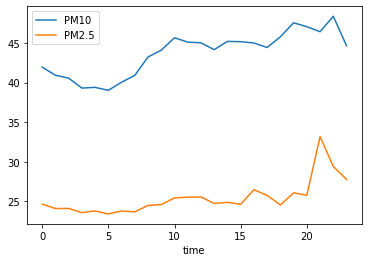

In [151]:
airdf_time.plot(x='time', y= ['PM10','PM2.5'])

## 결과 분석

[]

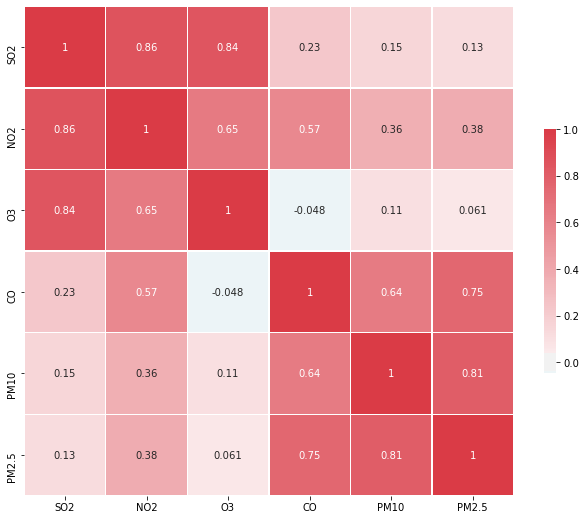

In [183]:
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(airdf_date.corr(), cmap=cmap, annot=True, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={'shrink': .5})
plt.plot()

[]

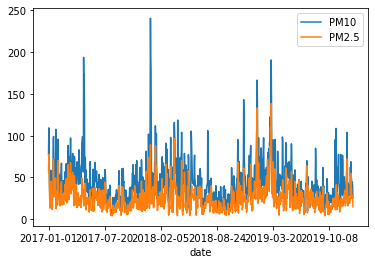

In [200]:

airdf_date.plot(x='date', y= ['PM10','PM2.5'])
plt.plot()

[]

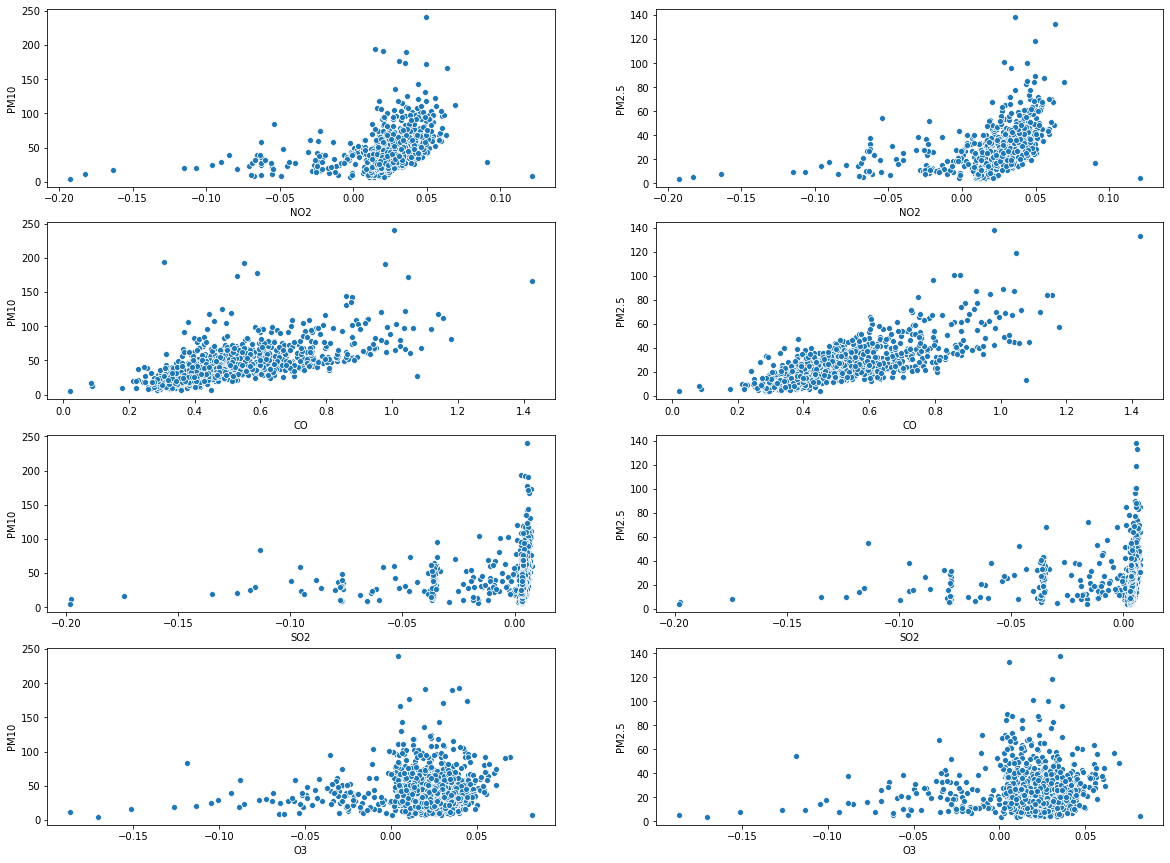

In [237]:
f, ax = plt.subplots(4, 2, figsize=(20,15))
sns.scatterplot(x='NO2', y= 'PM10', data=airdf_date, ax=ax[0,0])
sns.scatterplot(x='NO2', y= 'PM2.5', data=airdf_date, ax=ax[0,1])
sns.scatterplot(x='CO', y= 'PM10', data=airdf_date, ax=ax[1,0])
sns.scatterplot(x='CO', y= 'PM2.5', data=airdf_date, ax=ax[1,1])
sns.scatterplot(x='SO2', y= 'PM10', data=airdf_date, ax=ax[2,0])
sns.scatterplot(x='SO2', y= 'PM2.5', data=airdf_date, ax=ax[2,1])
sns.scatterplot(x='O3', y= 'PM10', data=airdf_date, ax=ax[3,0])
sns.scatterplot(x='O3', y= 'PM2.5', data=airdf_date, ax=ax[3,1])
plt.plot()
# 상관계수가 높은 NO2, CO의 경우 농도에 따라 대기오염이 상승하는 경향을 보여준다.

### 대기오염은 CO, NO2에 영향을 받는 것을 알 수 있었고 특히 CO는 대기오염에 많은 영향을 끼치며 높은 상관관계를 보이는 것을 알 수 있었다.

### TIME CORRELATION

[]

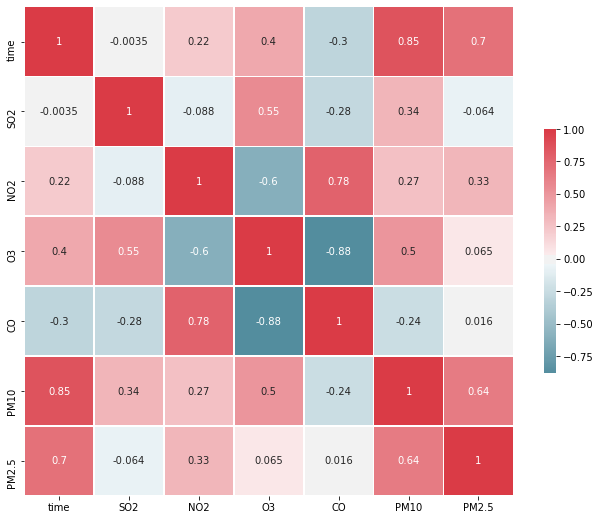

In [152]:
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(airdf_time.corr(), cmap=cmap, annot=True, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={'shrink': .5})
plt.plot()

In [153]:
airdf_time.corr()

,time,SO2,NO2,O3,CO,PM10,PM2.5
time,1.000000,-0.003464,0.215810,0.398308,-0.297497,0.854971,0.697680
SO2,-0.003464,1.000000,-0.087513,0.551669,-0.277118,0.336001,-0.064059
NO2,0.215810,-0.087513,1.000000,-0.603303,0.775535,0.268708,0.326818
O3,0.398308,0.551669,-0.603303,1.000000,-0.884175,0.502661,0.065166
CO,-0.297497,-0.277118,0.775535,-0.884175,1.000000,-0.239810,0.016262
PM10,0.854971,0.336001,0.268708,0.502661,-0.239810,1.000000,0.640941
PM2.5,0.697680,-0.064059,0.326818,0.065166,0.016262,0.640941,1.000000


[]

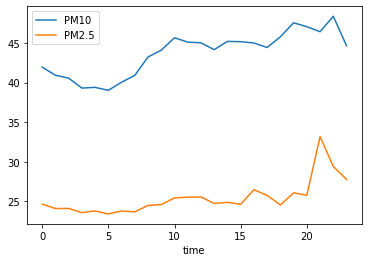

In [160]:
airdf_time.plot(x='time', y= ['PM10','PM2.5'])
plt.plot()
# 시간에 따라 PM10, PM2.5가 상승하는 경향을 볼 수 있다.

[]

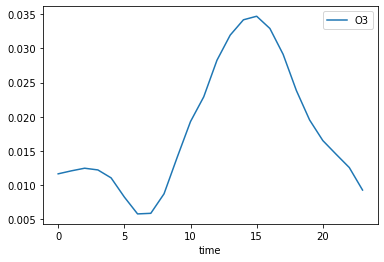

In [159]:
airdf_time.plot(x='time', y= 'O3')
plt.plot()
# 15시경을 중심으로 O3의 농도가 짙어지는 경향을 볼 수 있다.

[]

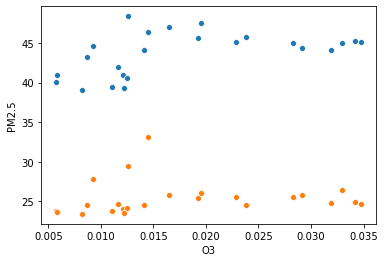

In [209]:
# 시간에 따라 대기오염이 상승하는 상관관계를 확인할 수 있었다.
# 그러나 시간에 따라 오존이 변하는 것은 대기오염에 영향을 줄 것이라고 생각했으나 직접적인 영향은 확인할 수 없었다.

sns.scatterplot(x='O3', y= 'PM10', data=airdf_time)
sns.scatterplot(x='O3', y= 'PM2.5', data=airdf_time)
plt.plot()
# O3의 농도에 따른 대기오염의 영향은 미미한 것으로 판단된다.

[]

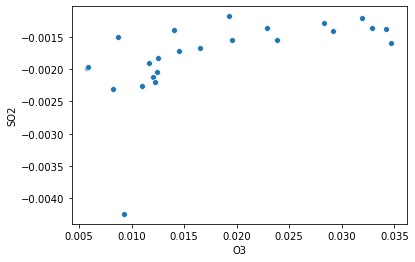

In [180]:
sns.scatterplot(x='O3', y= 'SO2', data=airdf_time)
plt.plot()

[]

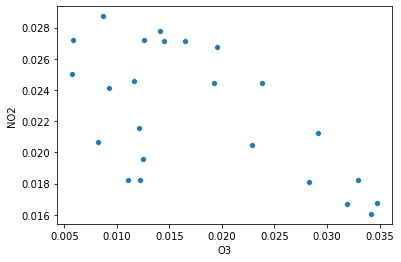

In [181]:
sns.scatterplot(x='O3', y= 'NO2', data=airdf_time)
plt.plot()

[]

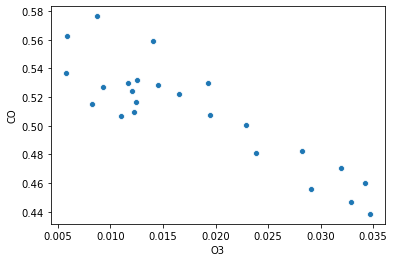

In [182]:
sns.scatterplot(x='O3', y= 'CO', data=airdf_time)
plt.plot()

### 그러나 O3는 SO2, NO2, CO와 높은 상관관계를 보이며 경향성을 보여주는 것으로 판단된다.
### 즉 O3는 대기오염에 직접적인 영향을 주는 것처럼 보이진 않지만 SO2, NO2, CO에 영향을 주어 간접적으로 대기오염에 영향을 미치는 것으로 판단된다.
### 결론적으로, 대기오염은 시간의 흐름에 따른 상관관계를 갖는다. 시간은 O3의 농도와 상관성이 높으며 O3는 직접적으로 대기오염에 관여하기보다는 SO2, NO2, CO와의 화학작용을 통해 간접적으로  대기오염에 영향을 준다고 보여진다.